In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
df=pd.read_excel('Adidas US Sales Datasets.xlsx')

In [20]:
df.head()

Retailer  Retailer ID Invoice Date     Region     State      City  \
0  Foot Locker      1185732   2020-01-01  Northeast  New York  New York   
1  Foot Locker      1185732   2020-01-02  Northeast  New York  New York   
2  Foot Locker      1185732   2020-01-03  Northeast  New York  New York   
3  Foot Locker      1185732   2020-01-04  Northeast  New York  New York   
4  Foot Locker      1185732   2020-01-05  Northeast  New York  New York   

                     Product  Price per Unit  Units Sold  Total Sales  \
0      Men's Street Footwear            50.0        1200     600000.0   
1    Men's Athletic Footwear            50.0        1000     500000.0   
2    Women's Street Footwear            40.0        1000     400000.0   
3  Women's Athletic Footwear            45.0         850     382500.0   
4              Men's Apparel            60.0         900     540000.0   

   Operating Profit  Operating Margin Sales Method  
0          300000.0              0.50     In-store  
1          150000.0              0.30     In-store  
2          140000.0              0.35     In-store  
3          133875.0              0.35     In-store  
4          162000.0              0.30     In-store

In [21]:
df.isnull().sum()

Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Product             0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
dtype: int64

In [22]:
df.duplicated().sum()

0

In [23]:
df.shape

(9648, 13)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer ID       9648 non-null   int64         
 2   Invoice Date      9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Product           9648 non-null   object        
 7   Price per Unit    9648 non-null   float64       
 8   Units Sold        9648 non-null   int64         
 9   Total Sales       9648 non-null   float64       
 10  Operating Profit  9648 non-null   float64       
 11  Operating Margin  9648 non-null   float64       
 12  Sales Method      9648 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 980.0+ KB


In [25]:
df.head()

Retailer  Retailer ID Invoice Date     Region     State      City  \
0  Foot Locker      1185732   2020-01-01  Northeast  New York  New York   
1  Foot Locker      1185732   2020-01-02  Northeast  New York  New York   
2  Foot Locker      1185732   2020-01-03  Northeast  New York  New York   
3  Foot Locker      1185732   2020-01-04  Northeast  New York  New York   
4  Foot Locker      1185732   2020-01-05  Northeast  New York  New York   

                     Product  Price per Unit  Units Sold  Total Sales  \
0      Men's Street Footwear            50.0        1200     600000.0   
1    Men's Athletic Footwear            50.0        1000     500000.0   
2    Women's Street Footwear            40.0        1000     400000.0   
3  Women's Athletic Footwear            45.0         850     382500.0   
4              Men's Apparel            60.0         900     540000.0   

   Operating Profit  Operating Margin Sales Method  
0          300000.0              0.50     In-store  
1          150000.0              0.30     In-store  
2          140000.0              0.35     In-store  
3          133875.0              0.35     In-store  
4          162000.0              0.30     In-store

In [28]:
# convert Invoice Date to Datetime Object.
df['Invoice Date']=pd.to_datetime(df['Invoice Date'])

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer ID       9648 non-null   int64         
 2   Invoice Date      9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Product           9648 non-null   object        
 7   Price per Unit    9648 non-null   float64       
 8   Units Sold        9648 non-null   int64         
 9   Total Sales       9648 non-null   float64       
 10  Operating Profit  9648 non-null   float64       
 11  Operating Margin  9648 non-null   float64       
 12  Sales Method      9648 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 980.0+ KB


In [ ]:
# 1. Sales Performance Analysis: Which products are excelling in sales, and which are underperforming?

# 2. Regional Market Analysis: Which stores are experiencing strong sales, and which ones are lagging?

# 3. Profit Margin Analysis: Does the profit margin significantly impact sales?

# 4. Efficiency of Sales Methods: Which sales method is more effective — in-store or online?

# 5. Price Optimization: Is there a specific price range that achieves better sales than others?

# 6. Product Portfolio Optimization I: Determine which products are most profitable, segmented by location.

# 7. Market Expansion Opportunities: Assess the best and worst performing stores based on their locations.

# 8. Time Series Analysis: Investigate whether there has been a consistent sales trend over time or any noticeable monthly trends.

# 9. Predictive Sales Analysis: Develop a forecast for monthly sales.

# 10. Tableau Sales Dashboard

In [31]:
total_revenue = df['Total Sales'].sum()
total_revenue

899902125.0

In [37]:
# 1. Sales Performance Analysis: Which products are excelling in sales, and which are underperforming?
product_sales = df.groupby('Product').agg({'Total Sales':'sum', 'Units Sold':'sum'}).reset_index()
top_performing_products = product_sales.sort_values(by='Total Sales', ascending=False)
top_performing_products

Product  Total Sales  Units Sold
2      Men's Street Footwear  208826244.0      593320
3            Women's Apparel  179038860.0      433827
1    Men's Athletic Footwear  153673680.0      435526
5    Women's Street Footwear  128002813.0      392269
0              Men's Apparel  123728632.0      306683
4  Women's Athletic Footwear  106631896.0      317236

In [42]:
# 2. Regional Market Analysis: Which stores are experiencing strong sales, and which ones are lagging?
stores_sales = df.groupby(['City','Retailer']).agg({'Total Sales':'sum', 'Units Sold':'sum'}).reset_index()
top_performing_states = stores_sales.sort_values(by='Total Sales', ascending=False).head()
top_performing_states

City     Retailer  Total Sales  Units Sold
97  San Francisco    West Gear   33360397.0       82655
22     Charleston  Foot Locker   28100127.0       68381
60    Los Angeles       Kohl's   25127160.0       74543
73       New York  Foot Locker   25008568.0       72196
99        Seattle    West Gear   24862675.0       42262

<Axes: >

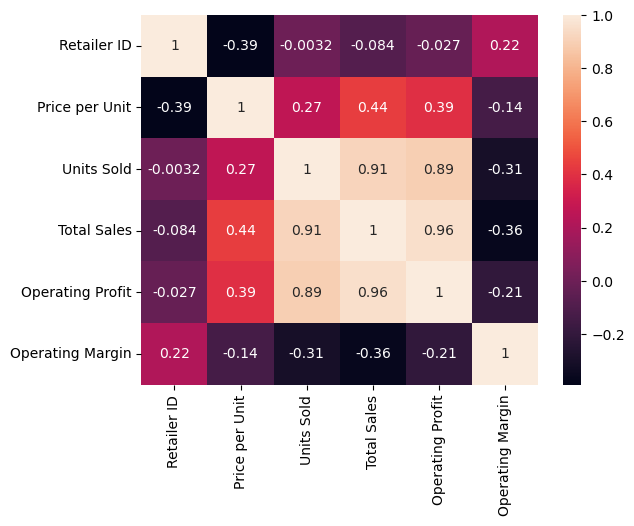

In [47]:
# 3. Profit Margin Analysis: Does the profit margin significantly impact sales?
numeric_df=df.select_dtypes(include='number')
sns.heatmap(numeric_df.corr(), annot=True)

In [48]:
df.columns

Index(['Retailer', 'Retailer ID', 'Invoice Date', 'Region', 'State', 'City',
       'Product', 'Price per Unit', 'Units Sold', 'Total Sales',
       'Operating Profit', 'Operating Margin', 'Sales Method'],
      dtype='object')

In [53]:
# 4. Efficiency of Sales Methods: Which sales method is more effective — in-store or online?
df.groupby('Sales Method').agg({'Total Sales':'sum','Units Sold':'sum','Operating Profit':'sum', 'Operating Margin':'sum'})

Total Sales  Units Sold  Operating Profit  Operating Margin
Sales Method                                                             
In-store      356643750.0      689990      1.275913e+08            619.65
Online        247672882.0      939093      9.655518e+07           2269.24
Outlet        295585493.0      849778      1.079883e+08           1192.13

In [57]:
df.columns

Index(['Retailer', 'Retailer ID', 'Invoice Date', 'Region', 'State', 'City',
       'Product', 'Price per Unit', 'Units Sold', 'Total Sales',
       'Operating Profit', 'Operating Margin', 'Sales Method'],
      dtype='object')

In [62]:
# 5. Price Optimization: Is there a specific price range that achieves better sales than others?

bins=[0,20,40,60,80,100,200]
labels=['0-20','20-40','40-60','60-80', '80-100', '100+']

df['price_range']=pd.cut(df['Price per Unit'], bins=bins, labels=labels)


price_range
0-20        6659931.0
20-40     164362210.0
40-60     431531309.0
60-80     243466864.0
80-100     48016105.0
100+        5865706.0
Name: Total Sales, dtype: float64

In [65]:
price_range_sales = df.groupby('price_range')['Total Sales'].sum().reset_index()
top_performing_price_range = price_range_sales.sort_values(by='Total Sales',ascending=False).head()
top_performing_price_range

price_range  Total Sales
2       40-60  431531309.0
3       60-80  243466864.0
1       20-40  164362210.0
4      80-100   48016105.0
0        0-20    6659931.0

In [67]:
# 6. Product Portfolio Optimization I: Determine which products are most profitable, segmented by location.
product_sales = df.groupby(['City','Product'])['Total Sales'].sum().reset_index()
top_performing_product_sales = product_sales.sort_values(by='Total Sales',ascending=False).head()
top_performing_product_sales

City                Product  Total Sales
62   Charleston  Men's Street Footwear    9479502.0
212    New York  Men's Street Footwear    8282659.0
63   Charleston        Women's Apparel    8147789.0
213    New York        Women's Apparel    7801393.0
254    Portland  Men's Street Footwear    7163817.0

In [73]:
# 7. Market Expansion Opportunities: Assess the best and worst performing stores based on their locations.
product_sales = df.groupby(['City','Retailer']).agg({'Total Sales':'sum', 'Operating Profit':'sum', 'Operating Margin':'sum'}).reset_index()
top_performing_product_sales = product_sales.sort_values(by='Total Sales',ascending=False)
top_performing_product_sales

City       Retailer  Total Sales  Operating Profit  \
97  San Francisco      West Gear   33360397.0        9843005.12   
22     Charleston    Foot Locker   28100127.0       10921979.98   
60    Los Angeles         Kohl's   25127160.0        8851301.95   
73       New York    Foot Locker   25008568.0        8874829.38   
99        Seattle      West Gear   24862675.0        6469771.84   
..            ...            ...          ...               ...   
81          Omaha  Sports Direct     664209.0         285278.33   
59    Los Angeles    Foot Locker     507753.0         193618.89   
33         Dallas    Foot Locker     420816.0         194888.42   
13     Birmingham         Amazon     409091.0         146947.48   
54      Knoxville    Foot Locker     321225.0         122641.99   

    Operating Margin  
97             72.45  
22             67.62  
60             84.68  
73             54.97  
99             43.63  
..               ...  
81              3.96  
59              5.18  
33              5.75  
13              4.84  
54              5.17  

[108 rows x 5 columns]

In [77]:
# Assuming your DataFrame is named 'df'
df['Invoice Date'] = pd.to_datetime(df['Invoice Date'])
df.set_index('Invoice Date', inplace=True)

In [78]:
monthly_sales = df['Total Sales'].resample('M').sum()

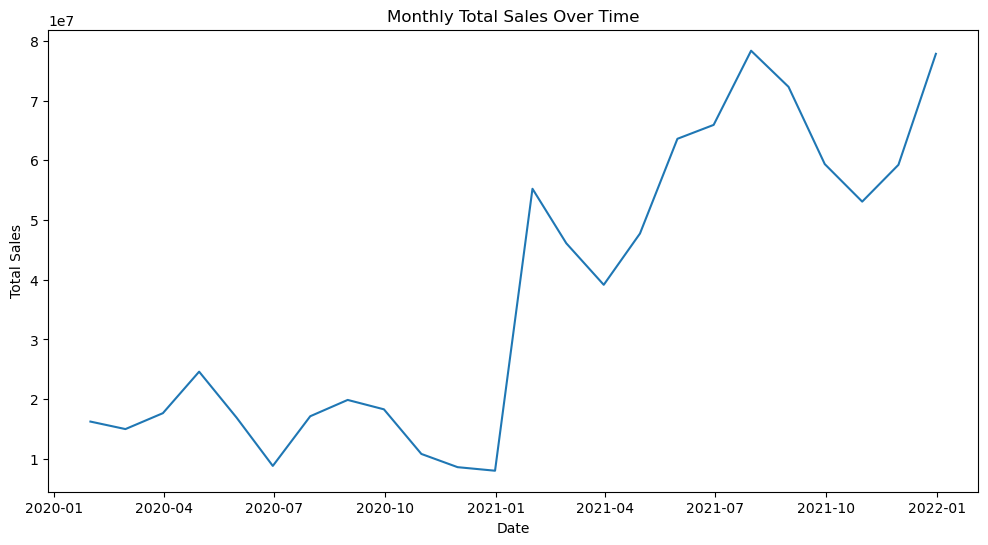

In [79]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales)
plt.title('Monthly Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

In [80]:
df.head()

Retailer  Retailer ID     Region     State      City  \
Invoice Date                                                            
2020-01-01    Foot Locker      1185732  Northeast  New York  New York   
2020-01-02    Foot Locker      1185732  Northeast  New York  New York   
2020-01-03    Foot Locker      1185732  Northeast  New York  New York   
2020-01-04    Foot Locker      1185732  Northeast  New York  New York   
2020-01-05    Foot Locker      1185732  Northeast  New York  New York   

                                Product  Price per Unit  Units Sold  \
Invoice Date                                                          
2020-01-01        Men's Street Footwear            50.0        1200   
2020-01-02      Men's Athletic Footwear            50.0        1000   
2020-01-03      Women's Street Footwear            40.0        1000   
2020-01-04    Women's Athletic Footwear            45.0         850   
2020-01-05                Men's Apparel            60.0         900   

              Total Sales  Operating Profit  Operating Margin Sales Method  \
Invoice Date                                                                 
2020-01-01       600000.0          300000.0              0.50     In-store   
2020-01-02       500000.0          150000.0              0.30     In-store   
2020-01-03       400000.0          140000.0              0.35     In-store   
2020-01-04       382500.0          133875.0              0.35     In-store   
2020-01-05       540000.0          162000.0              0.30     In-store   

             price_range  
Invoice Date              
2020-01-01         40-60  
2020-01-02         40-60  
2020-01-03         20-40  
2020-01-04         40-60  
2020-01-05         40-60

Mean Squared Error: 109170310053386.05


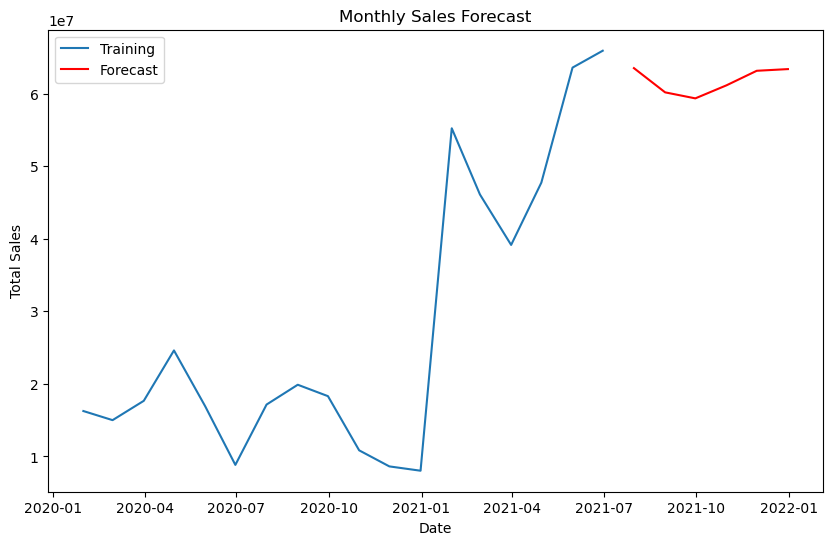

In [92]:
# 9. Predictive Sales Analysis: Develop a forecast for monthly sales.
from statsmodels.tsa.arima.model import ARIMA

# Split the data into training and testing sets. You can use the first part of the data for training and the rest for testing.
train_data = monthly_sales.iloc[:len(monthly_sales)-6]  # Use first n-12 months for training
test_data = monthly_sales.iloc[len(monthly_sales)-6:]   # Use last 12 months for testing
# train_data = monthly_sales.loc[:'2022-01-01']  # Use data up to January 2022 for training
# test_data = monthly_sales.loc['2022-02-01':]   # Use data from February 2022 onwards for testing


p = 2  # Autoregressive order
d = 1  # Differencing order
q = 2  # Moving average order

# Fit an ARIMA model to the training data.
model = ARIMA(train_data, order=(p, d, q))  # Specify order (p, d, q) based on model evaluation
fitted_model = model.fit()

# Use the trained model to make predictions on the testing data.
forecast = fitted_model.forecast(steps=6)  # Forecast for the next 12 months


# Compare the predicted values with the actual values from the test data to evaluate the model's performance.
# Example evaluation
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_data, forecast)
print("Mean Squared Error:", mse)

# Visualize the actual sales data along with the forecasted values.
plt.figure(figsize=(10, 6))
plt.plot(train_data, label='Training')
plt.plot(test_data.index, forecast, label='Forecast', color='red')
plt.title('Monthly Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.show()
